In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def P_n(ρ, n):
  if (n>0):
    return (ρ**n)*(1-ρ) + P_n(ρ, n-1)
  else:
    return 0

ρ = 1
while(ρ >= 1):
  λ = float(input("Введите интенсивность входящего потока λ: "))
  T_ob = float(input("Введите среднее время разгрузки T_ob: "))
  μ = 1/T_ob
  ρ = λ/μ
  if (ρ >= 1): print("ρ получилось больше единицы, введите новые данные, пожалуйста")

L_och, T_och, T_SMO = 0, 0, 0

L_och = (ρ**2)/(1-ρ)
T_och = L_och/λ
T_SMO = T_och + T_ob
m = ρ/(1-ρ)
P0 = 1-ρ
P123 = P_n(ρ, 3)

print("\nСреднее число заявок в очереди", round(L_och, 4),
      "\nСреднее время ожидания заявки в очереди", round(T_och, 4),
      "\nСреднее число заявок в системе", round(m, 4),
      "\nСреднее время пребывания заявки", round(T_SMO, 4),
      "\nКоэффициент простоя системы", round(P0, 4),
      "\nВероятность того, что ожидают разгрузки не более чем два судна", round(P123, 4))

Введите интенсивность входящего потока λ: 0.4
Введите среднее время разгрузки T_ob: 2

Среднее число заявок в очереди 3.2 
Среднее время ожидания заявки в очереди 8.0 
Среднее число заявок в системе 4.0 
Среднее время пребывания заявки 10.0 
Коэффициент простоя системы 0.2 
Вероятность того, что ожидают разгрузки не более чем два судна 0.3904


Количество шагов значений n: 10


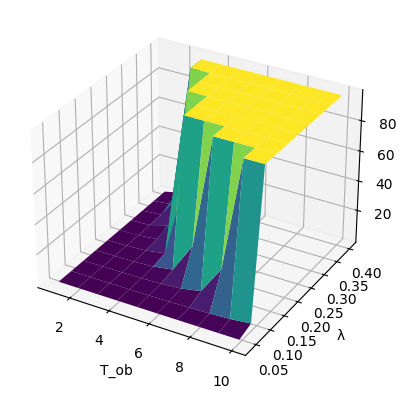

In [ ]:
n = int(input("Количество шагов значений n: "))

x = np.linspace(1, 10, n) # T_ob range
y = np.linspace(λ/10, λ, n) # λ range
L_och_array = np.zeros((n, n)) # Result array

for i, xi in enumerate(x):
    for j, yj in enumerate(y):
      # Для больших n может понадобиться большая точность чем 0.99
      ρ = xi * yj if xi * yj < 1 else 0.99
      L_och_array[i, j] = (ρ**2)/(1-ρ)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, L_och_array, cmap="viridis")

# Добавляем подписи к осям
ax.set_xlabel('T_ob')
ax.set_ylabel('λ')
ax.set_zlabel('L_och')

plt.show()